In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# load csv files
listing_data = pd.read_csv("Data/TO-Listings.csv")

listing_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,24018771,https://www.airbnb.com/rooms/24018771,2.024010e+13,2024-01-08,city scrape,Home in Toronto · ★4.74 · 1 bedroom · 1 bed · ...,NaN,NaN,https://a0.muscache.com/pictures/1030ee76-f3f7...,179038571,...,4.78,4.77,4.72,STR-2009-FDSXPB,f,3,0,3,0,1.83
1,50680103,https://www.airbnb.com/rooms/50680103,2.024010e+13,2024-01-08,city scrape,Boat in Toronto · 1 bedroom · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/91f84c43-e010...,396389036,...,NaN,NaN,NaN,Exempt,t,1,1,0,0,NaN
2,1018845223985730763,https://www.airbnb.com/rooms/1018845223985730763,2.024010e+13,2024-01-08,city scrape,Townhouse in Toronto · ★New · 1 bedroom · 1 be...,NaN,NaN,https://a0.muscache.com/pictures/f1e047ed-949d...,9660032,...,NaN,NaN,NaN,NaN,t,4,1,3,0,NaN
3,842991103042611460,https://www.airbnb.com/rooms/842991103042611460,2.024010e+13,2024-01-08,city scrape,Bed and breakfast in Toronto · ★4.67 · 1 bedro...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,128444795,...,5.00,5.00,5.00,STR-2011-GTCKVH,f,1,0,1,0,0.51
4,1004965626999219484,https://www.airbnb.com/rooms/1004965626999219484,2.024010e+13,2024-01-08,city scrape,Home in Toronto · ★4.73 · 1 bedroom · 4 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,120551336,...,5.00,4.93,4.80,STR-2310-GYFHHV,f,1,0,1,0,6.92


In [76]:
columns_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description',
                   'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name',
                   'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'host_neighbourhood','host_has_profile_pic', 'neighbourhood_group_cleansed', 'latitude', 'longitude',
                   'property_type', 'bathrooms',  'bedrooms','amenities', 'price','minimum_minimum_nights',
                   'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
                   'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
                   'calendar_last_scraped', 'first_review', 'last_review','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location', 'review_scores_value',
                   'license','calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
                   'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'host_verifications',
                   'neighbourhood', 'host_since',
                   'neighbourhood_cleansed', 'host_identity_verified']

listing_data = listing_data.drop(columns=columns_to_drop)

In [77]:
listing_data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,room_type,accommodates,bathrooms_text,beds,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count
0,within an hour,98%,100%,t,3.0,3.0,Private room,1,1 private bath,1.0,...,14,44,74,163,127,41,5,4.74,f,3
1,NaN,NaN,NaN,f,1.0,4.0,Entire home/apt,2,1 bath,NaN,...,30,60,90,365,0,0,0,NaN,t,1
2,within an hour,83%,95%,f,6.0,10.0,Private room,1,1 private bath,1.0,...,3,33,62,62,0,0,0,NaN,t,4
3,within an hour,80%,88%,f,4.0,15.0,Private room,1,1 shared bath,1.0,...,30,60,90,365,3,3,0,4.67,f,1
4,within an hour,100%,94%,t,1.0,1.0,Private room,3,1 private bath,4.0,...,22,51,81,171,15,15,9,4.73,f,1


In [78]:
print(listing_data['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [79]:
response_time_map = {'within an hour': 5, 'within a few hours': 4, 'within a day': 3,
                'a few days or more': 2, float('nan'): 0}
listing_data['host_response_time'] = listing_data['host_response_time'].map(response_time_map)

In [80]:
room_type_map = {'Private room': 2, 'Entire home/apt': 4, 'Shared room': 1, 'Hotel room': 3}

listing_data['room_type'] = listing_data['room_type'].map(room_type_map)

In [81]:
instant_bookable_map = {'t': 1, 'f': -1}

listing_data['instant_bookable'] = listing_data['instant_bookable'].map(instant_bookable_map)

In [82]:
is_superhost_map = {'t': 1, 'f': -1}

listing_data['host_is_superhost'] = listing_data['host_is_superhost'].map(is_superhost_map)

In [83]:
listing_data['host_response_rate'] = listing_data['host_response_rate'].replace('%', '', regex=True).astype(float) / 100

listing_data['host_acceptance_rate'] = listing_data['host_acceptance_rate'].replace('%', '', regex=True).astype(float) / 100


listing_data['host_response_rate'] = listing_data['host_response_rate'].replace(float('nan'), 0.8, regex=True).astype(float)

listing_data['host_acceptance_rate'] = listing_data['host_acceptance_rate'].replace(float('nan'), 0.8, regex=True).astype(float)


In [84]:
listing_data['review_scores_rating'] = listing_data['review_scores_rating'].replace(float('nan'), 3.5, regex=True).astype(float)


In [ ]:
hoods = ['Hillcrest Village' 'Waterfront Communities-The Island' 'Rexdale-Kipling'
 "Tam O'Shanter-Sullivan" 'Rouge' 'Steeles' 'West Humber-Clairville'
 'Morningside' 'Bayview Village' 'Agincourt South-Malvern West'
 'Downsview-Roding-CFB' 'Centennial Scarborough' 'Don Valley Village'
 'Birchcliffe-Cliffside' 'Malvern' 'Flemingdon Park' 'Guildwood'
 'Parkwoods-Donalda' 'Pleasant View' 'High Park-Swansea'
 'Wexford/Maryvale' 'Henry Farm' 'Pelmo Park-Humberlea'
 'Mount Olive-Silverstone-Jamestown' "O'Connor-Parkview"
 'Danforth East York' 'Banbury-Don Mills' 'Yorkdale-Glen Park' 'Bendale'
 'Stonegate-Queensway' 'St.Andrew-Windfields' 'Old East York'
 'Leaside-Bennington' 'New Toronto' 'East End-Danforth'
 'Clairlea-Birchmount' 'Mimico (includes Humber Bay Shores)'
 'Clanton Park' 'Black Creek' 'West Hill' 'Woodbine-Lumsden' 'Weston'
 'Lawrence Park South' 'Lawrence Park North' 'Mount Dennis'
 'Brookhaven-Amesbury' 'Westminster-Branson' 'Bathurst Manor'
 'Beechborough-Greenbrook' 'Rustic' 'Oakridge' 'Glenfield-Jane Heights'
 'Caledonia-Fairbank' 'Agincourt North' 'Milliken'
 'York University Heights' 'South Riverdale' 'Greenwood-Coxwell'
 'Dorset Park' 'Corso Italia-Davenport' 'Englemount-Lawrence'
 'Woodbine Corridor' 'Mount Pleasant East' 'Yonge-Eglinton'
 'Playter Estates-Danforth' 'Newtonbrook East' 'Roncesvalles'
 'Newtonbrook West' 'Annex' 'Wychwood' 'Willowdale East' 'Willowdale West'
 'Mount Pleasant West' 'Moss Park' 'University' 'Casa Loma'
 'Eringate-Centennial-West Deane' 'Long Branch'
 'Dovercourt-Wallace Emerson-Junction' 'Niagara' 'Little Portugal'
 'Trinity-Bellwoods' 'Palmerston-Little Italy' 'Bay Street Corridor'
 'Kensington-Chinatown' 'Church-Yonge Corridor' 'Dufferin Grove'
 'Danforth' 'Rockcliffe-Smythe' 'Etobicoke West Mall' 'Yonge-St.Clair'
 'South Parkdale' 'North Riverdale' 'Junction Area' 'Weston-Pellam Park'
 'Islington-City Centre West' 'Regent Park' 'Briar Hill-Belgravia'
 'Highland Creek' 'Humber Summit' 'Cliffcrest' 'Lambton Baby Point'
 'Taylor-Massey' 'Oakwood Village' 'Broadview North'
 'Keelesdale-Eglinton West' 'Lansing-Westgate'
 'Cabbagetown-South St.James Town' 'The Beaches' 'Alderwood'
 'High Park North' 'Forest Hill North' 'Woburn' 'North St.James Town'
 'Eglinton East' 'Humewood-Cedarvale' 'Forest Hill South' 'Maple Leaf'
 'Edenbridge-Humber Valley' 'Willowridge-Martingrove-Richview'
 'Kennedy Park' 'Kingsview Village-The Westway' 'Blake-Jones'
 'Bedford Park-Nortown' 'Bridle Path-Sunnybrook-York Mills'
 'Victoria Village' 'Rosedale-Moore Park' 'Scarborough Village' 'Ionview'
 'Humbermede' "L'Amoreaux" 'Bayview Woods-Steeles' 'Markland Wood'
 'Princess-Rosethorn' 'Elms-Old Rexdale' 'Thistletown-Beaumond Heights'
 'Thorncliffe Park' 'Humber Heights-Westmount' 'Kingsway South'
 'Runnymede-Bloor West Village']

for i in hoods:
    # get the average price
    avg = 
    #replace the name with the price in the df
    

In [47]:
print(listing_data['neighbourhood_cleansed'].unique())

['Hillcrest Village' 'Waterfront Communities-The Island' 'Rexdale-Kipling'
 "Tam O'Shanter-Sullivan" 'Rouge' 'Steeles' 'West Humber-Clairville'
 'Morningside' 'Bayview Village' 'Agincourt South-Malvern West'
 'Downsview-Roding-CFB' 'Centennial Scarborough' 'Don Valley Village'
 'Birchcliffe-Cliffside' 'Malvern' 'Flemingdon Park' 'Guildwood'
 'Parkwoods-Donalda' 'Pleasant View' 'High Park-Swansea'
 'Wexford/Maryvale' 'Henry Farm' 'Pelmo Park-Humberlea'
 'Mount Olive-Silverstone-Jamestown' "O'Connor-Parkview"
 'Danforth East York' 'Banbury-Don Mills' 'Yorkdale-Glen Park' 'Bendale'
 'Stonegate-Queensway' 'St.Andrew-Windfields' 'Old East York'
 'Leaside-Bennington' 'New Toronto' 'East End-Danforth'
 'Clairlea-Birchmount' 'Mimico (includes Humber Bay Shores)'
 'Clanton Park' 'Black Creek' 'West Hill' 'Woodbine-Lumsden' 'Weston'
 'Lawrence Park South' 'Lawrence Park North' 'Mount Dennis'
 'Brookhaven-Amesbury' 'Westminster-Branson' 'Bathurst Manor'
 'Beechborough-Greenbrook' 'Rustic' 'Oakrid

In [85]:
listing_data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,room_type,accommodates,bathrooms_text,beds,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,instant_bookable,calculated_host_listings_count
0,5,0.98,1.00,1.0,3.0,3.0,2,1,1 private bath,1.0,...,14,44,74,163,127,41,5,4.74,-1,3
1,0,0.80,0.80,-1.0,1.0,4.0,4,2,1 bath,NaN,...,30,60,90,365,0,0,0,3.50,1,1
2,5,0.83,0.95,-1.0,6.0,10.0,2,1,1 private bath,1.0,...,3,33,62,62,0,0,0,3.50,1,4
3,5,0.80,0.88,-1.0,4.0,15.0,2,1,1 shared bath,1.0,...,30,60,90,365,3,3,0,4.67,-1,1
4,5,1.00,0.94,1.0,1.0,1.0,2,3,1 private bath,4.0,...,22,51,81,171,15,15,9,4.73,-1,1


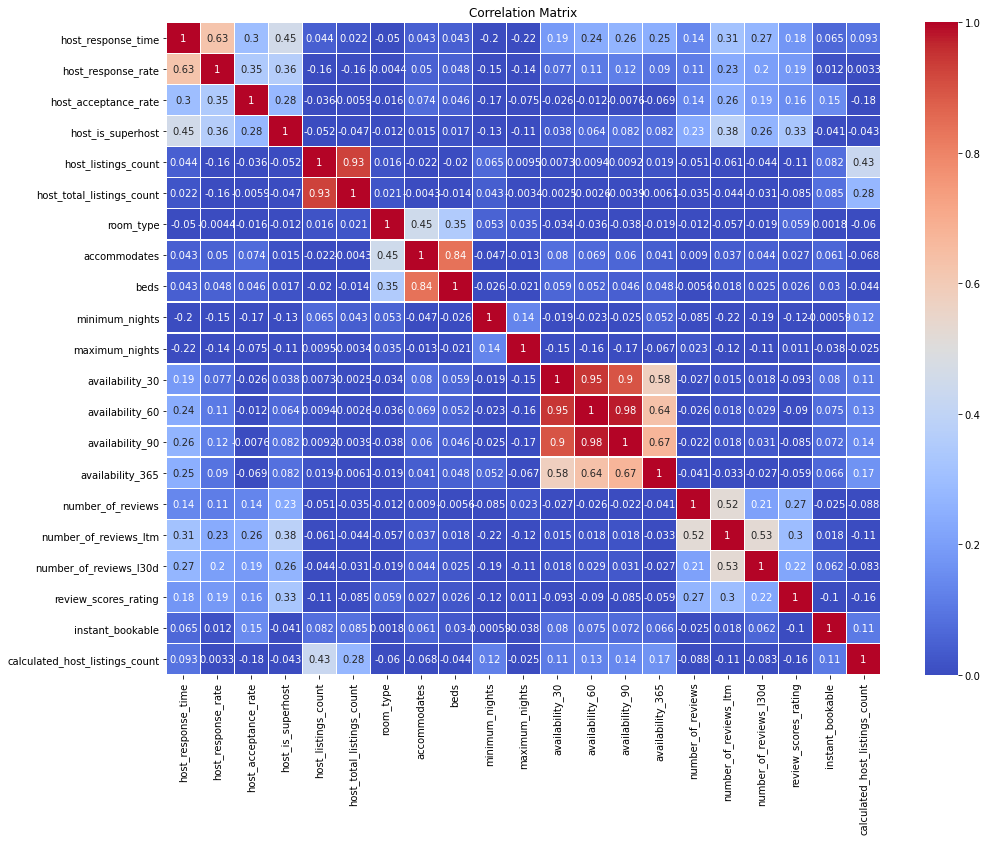

In [88]:
correlation = listing_data.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()